# GENERATE NEW EVENTS DB FILE

In [1]:
import pandas as pd
import numpy as np
import json
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
os.listdir('data')

['2022-03-13_eventsDB.csv',
 '2022-03-16_eventsDB.csv',
 'adds1548_1554.csv',
 'backup_eventsDB_.js',
 'bkups',
 'celebrity_deaths_4.csv',
 'df_main.csv',
 'economists_lifetimes.csv',
 'eventsDB.js',
 'eventsDB.test',
 'eventsDB_.js',
 'eventsWIP.xlsx',
 'events_db.csv',
 'events_master.csv',
 'list_of_presidents_of_france-836j.csv',
 'list_of_prime_ministers_of_uk-839j.csv',
 'pantheon.tsv',
 'philosophers.csv',
 'README.md',
 'US_Presidents.json',
 'world_events.js',
 'world_events.json',
 'world_events.txt']

In [3]:
master_file = 'data/events_master.csv'
df = pd.read_csv(master_file, encoding = "ISO-8859-1")
df = df.replace(r'^\s+$', np.nan, regex=True) #get rid of unwanted blank spaces in cells...

In [4]:
df['event'] = df['event'].str.strip()
#df = df.drop(['Alternatives'], axis=1)

In [5]:
print(df.shape, df.columns)

(183, 28) Index(['eventID', 'stem', 'event', 'details', 'wikipedia', 'mnemonic',
       'itemDifficulty', 'categories', 'America', 'Europe', 'Asia', 'Africa',
       'China', 'Discovery', 'Britain', 'France', 'Greek', 'India',
       'Invention', 'MiddleEast', 'prehistory', 'Religion', 'Roman', 'Royalty',
       'Russia', 'Science', 'Wars', 'World'],
      dtype='object')


In [6]:
df.sample(3)

,eventID,stem,event,details,wikipedia,mnemonic,itemDifficulty,categories,America,Europe,...,Invention,MiddleEast,prehistory,Religion,Roman,Royalty,Russia,Science,Wars,World
80,81,1803,"Start of the Lewis & Clark expedition, in Amer...","The Lewis and Clark Expedition from August 31,...",https://en.wikipedia.org/wiki/Lewis_and_Clark_...,It took exactly 30 years after America indepen...,4.0,"[Expeditions, Firsts, ]",1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,119,1945,End of Second World War;,NaN,NaN,NaN,1.0,"[Wars, ]",NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,15,327 BC,Empire of Alexander the Great reaches into Ind...,NaN,NaN,NaN,6.0,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# might need to do this for other columns as well.
categories = ['Asia', 'China', 'Britain', 'Roman']
for c in categories:
    df = df.astype({c: 'float64'})

In [8]:
#verify
df.select_dtypes('object')

,stem,event,details,wikipedia,mnemonic,categories,America
0,c.3500 BC,Invention of the wheel and plough in Mesopotam...,NaN,NaN,NaN,"[prehistory,]",NaN
1,c.3200 BC,Invention of writing in Mesopotamia: the means...,NaN,NaN,NaN,"[prehistory,]",NaN
2,c.3000 BC,Founding of the first cities in Sumeria (prese...,NaN,NaN,NaN,"[prehistory,]",NaN
3,c.3000 BC,Building of the Great Pyramid.,NaN,NaN,NaN,"[prehistory,]",NaN
4,c.1600 BC,Modern alphabet invented: the essential means ...,NaN,NaN,NaN,"[prehistory,]",NaN
...,...,...,...,...,...,...,...
178,1996,Dolly the sheep becomes the first mammal to be...,Her birth proved that specialised cells could ...,https://en.wikipedia.org/wiki/Dolly_(sheep),NaN,NaN,NaN
179,1997,Tony Blair back in power in UK. Mohd. Khatami ...,NaN,NaN,NaN,NaN,NaN
180,1998,Indonesian President Suharto resigns. Pakistan...,NaN,NaN,NaN,NaN,1
181,1999,G-15 Summit ends,NaN,NaN,NaN,NaN,NaN


In [9]:
print(df.select_dtypes('object').shape)

(183, 7)


In [10]:
col = "America"
df[col].unique()
#cond = (df[col]=="1")
#df[cond]

array([nan, '1'], dtype=object)

In [11]:
df.describe().columns

Index(['eventID', 'itemDifficulty', 'Europe', 'Asia', 'Africa', 'China',
       'Discovery', 'Britain', 'France', 'Greek', 'India', 'Invention',
       'MiddleEast', 'prehistory', 'Religion', 'Roman', 'Royalty', 'Russia',
       'Science', 'Wars', 'World'],
      dtype='object')

In [12]:
df.sum()

eventID                                                       16764
stem              c.3500 BCc.3200 BCc.3000 BCc.3000 BCc.1600 BCc...
event             Invention of the wheel and plough in Mesopotam...
itemDifficulty                                                  996
Europe                                                           73
Asia                                                             31
Africa                                                            7
China                                                            14
Discovery                                                         6
Britain                                                          27
France                                                            8
Greek                                                             3
India                                                            12
Invention                                                         1
MiddleEast                                      

In [13]:
diffcat  = pd.cut(df['itemDifficulty'], bins=3, labels=['E',"M", 'H'])
df['diffCat'] = diffcat

## Adding 2 Date based Columns
### 1. YearNum
### 2. TimePeriod (pd. cut)

In [14]:
def getYearNum(x):
    mult = 1
    if "BC" in x:
        x = x.replace('BC', '')                
        mult = -1
    x = x.replace('c.','') #handle circa
    x = x.replace('AD','')
        
    try:
        yr = mult * int(x)
    except:
        print('CONVERSION ERROR while attempting...')
        print(x)
        yr = x
        
    return(yr)

In [15]:
df['YearNum'] = df['stem'].apply(getYearNum)

In [16]:
bins = [-15000, 0, 500, 1000, 1500, 1700, 1800, 1900, 2100]
labels = ['BCE', '0AD-500AD', '500AD-1000AD', '1000AD-1500AD', '1500AD-1700AD', '1700s', '1800s', '1900-Present']
df['timePeriod'] = pd.cut(df['YearNum'], bins = bins, labels = labels)

# Add 3 new columns
- altsEasy
- altsMed
- altsHard

In [17]:
def get_valid_alts(baseyr, perturbs):
    """
    returns a list of valid distractors
    
    baseyr is the correct year. 
    @perturbs is a list of numbers to be added or subtracted
    """    
    options = [baseyr + p for p in perturbs] + [baseyr + (-1*p) for p in perturbs]
    return [dte for dte in options if (dte>0 and dte<2000)]


def get_valid_BC_alts(baseyr, perturbs):
    """
    returns a list of valid distractors
    
    baseyr is the correct year. 
    @perturbs is a list of numbers to be added or subtracted
    """    
    perturbs = [1,2,5]
    options = [baseyr + p for p in perturbs] + [baseyr + (-1*p) for p in perturbs]
    return [dte for dte in options if (dte>0 and dte<2000)]

    
    
diff_perturbs = [100,50, 20,10, 5, 2, 1]
med_perturbs = [100, 20,10, 5]
easy_perturbs = [200, 100,50,20]

perturbationDict = {'Hard': diff_perturbs, 'Medium': med_perturbs, 'Easy': easy_perturbs}

In [18]:
def get_alternatives(_str, difflevel='Hard'):
    
    
    nums = [int(s) for s in _str.split() if s.isdigit()]
    numstr = [s for s in _str.split() if s.isdigit()]
    
    options = None
    perturbs = perturbationDict[difflevel]

    if "BC" in _str:
        if "c." in _str: #circa BC, so give only approx alternatives.
            _str = _str.replace('c.','')
            _str = _str.replace('BC', '')
            nums = [int(s) for s in _str.split() if s.isdigit()]
            numstr = [s for s in _str.split() if s.isdigit()]
            if len(nums)==1:
                nstr = numstr[0]
                if nstr[-3:] == '000':
                    part = int(nstr[:-3])
                    options = get_valid_BC_alts(part, perturbs)
                    return [f' c. {x}000 BC' for x in options if x>0]

                if nstr[-2:] == '00':
                    part = int(nstr[:-2])
                    options = get_valid_BC_alts(part, perturbs)
                    return [f' c. {x}00 BC' for x in options if x >0]                
                
                if nstr[-1] == '0':
                    part = int(nstr[:-1])
                    options = get_valid_BC_alts(part, perturbs)
                    return [f' c. {x}0 BC' for x in options if x >0]                            
                else:
                    numpart = int(nstr)
                    options = get_valid_BC_alts(numpart, perturbs)
                    return [f' c. {x} BC' for x in options if x >0]                            
                    
            
        #case where there is BC but not circa
        #Exact BC year is presumed known
        elif len(nums)==1:
            part = int(nums[0])
            options = get_valid_alts(part, perturbs)
            return [f'{x} BC' for x in options if x>0]        
        
        else: #something not right
            print(f'something not right for {_str}')
            return _str
    
    
    elif 'c.AD' in _str:
        if len(nums)==1:
            a = nums[0]
            options = get_valid_alts(a, perturbs)
            return [f'c. {x} AD' for x in options]
        else:
            print(f'Error in {_str} {nums}')
        
    else: #AD single number event
        nums = [int(s) for s in _str.split() if s.isdigit()]
        if len(nums)==1:
            numpart = nums[0]
            options = get_valid_alts(numpart, perturbs)            
                
        return options

In [19]:
altuples = [('altsMid', 'Medium'), ('altsHard', 'Hard'), ('altsEasy', 'Easy') ]

for a in altuples:
    col, lvl = a
    print(col, lvl)
    df[col] = df['stem'].apply(get_alternatives, difflevel=lvl)
    print(f'{df[col].isnull().sum()} missing')
    fewest_options = df[col].apply(len).min()
    print(f' fewest options are {fewest_options}')
    
print('df now has 3 new columns with Alternatives')

altsMid Medium
0 missing
 fewest options are 4
altsHard Hard
0 missing
 fewest options are 5
altsEasy Easy
0 missing
 fewest options are 4
df now has 3 new columns with Alternatives


In [20]:
pd.set_option('display.max_colwidth', 120)
df[['stem', col]].sample(5)

,stem,altsEasy
103,1911,"[1961, 1931, 1711, 1811, 1861, 1891]"
180,1998,"[1798, 1898, 1948, 1978]"
154,1978,"[1998, 1778, 1878, 1928, 1958]"
18,55 BC,"[255 BC, 155 BC, 105 BC, 75 BC, 5 BC, 35 BC]"
116,1939,"[1989, 1959, 1739, 1839, 1889, 1919]"


In [21]:
# Just for visual inspections
cond = (df[col].apply(len)==fewest_options)
df[cond][col]

156    [1780, 1880, 1930, 1960]
157    [1780, 1880, 1930, 1960]
158    [1782, 1882, 1932, 1962]
159    [1783, 1883, 1933, 1963]
160    [1785, 1885, 1935, 1965]
161    [1785, 1885, 1935, 1965]
162    [1785, 1885, 1935, 1965]
163    [1786, 1886, 1936, 1966]
164    [1787, 1887, 1937, 1967]
165    [1788, 1888, 1938, 1968]
166    [1789, 1889, 1939, 1969]
167    [1789, 1889, 1939, 1969]
168    [1790, 1890, 1940, 1970]
169    [1791, 1891, 1941, 1971]
170    [1793, 1893, 1943, 1973]
171    [1794, 1894, 1944, 1974]
172    [1795, 1895, 1945, 1975]
173    [1796, 1896, 1946, 1976]
174    [1796, 1896, 1946, 1976]
175    [1796, 1896, 1946, 1976]
176    [1796, 1896, 1946, 1976]
177    [1796, 1896, 1946, 1976]
178    [1796, 1896, 1946, 1976]
179    [1797, 1897, 1947, 1977]
180    [1798, 1898, 1948, 1978]
181    [1799, 1899, 1949, 1979]
182    [1799, 1899, 1949, 1979]
Name: altsEasy, dtype: object

-------
# Save the events DB file

In [22]:
from datetime import date

today = date.today()
print(f"Today's date: {today}")

Today's date: 2022-03-17


In [23]:
csvfilename = f'data/{today}_eventsDB.csv'
df.to_csv(csvfilename, index=False);
print(f'wrote file {csvfilename}')

wrote file data/2022-03-17_eventsDB.csv


In [24]:
if 0:
    row = df.sample(10).index
    new = df.loc[row]['Date'].apply(get_alternatives)
    pd.DataFrame(np.column_stack([df.loc[row]['Date'], new]))

In [25]:
#cut and paste this output to the file called: eventsDB.js
df.T.to_json('data/backup_eventsDB_.js')

In [26]:
bigstring = df.T.to_json()

In [27]:
outJSfile = f'data/eventsDB.js'
with open(outJSfile, "w") as text_file:
    text_file.write('events = ' + bigstring)

In [28]:
added_columns = ['YearNum', 'timePeriod',
       'altsMid', 'altsHard', 'altsEasy', 'stem', 'diffCat']
for c in added_columns:
    print(c in df.columns)

True
True
True
True
True
True
True


In [29]:
df.shape

(183, 34)

----
# Plotting

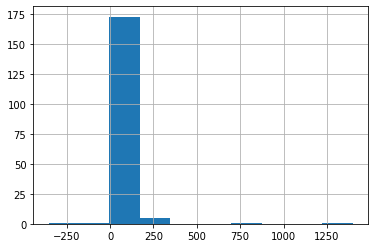

In [30]:
df['YearNum'].diff().hist()

In [31]:
diffcat.value_counts()

M    89
E    49
H    38
Name: itemDifficulty, dtype: int64

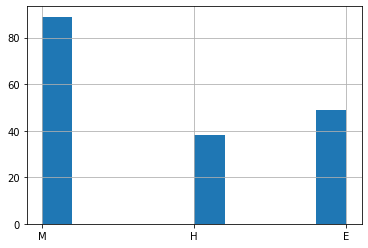

In [32]:
diffcat.hist()

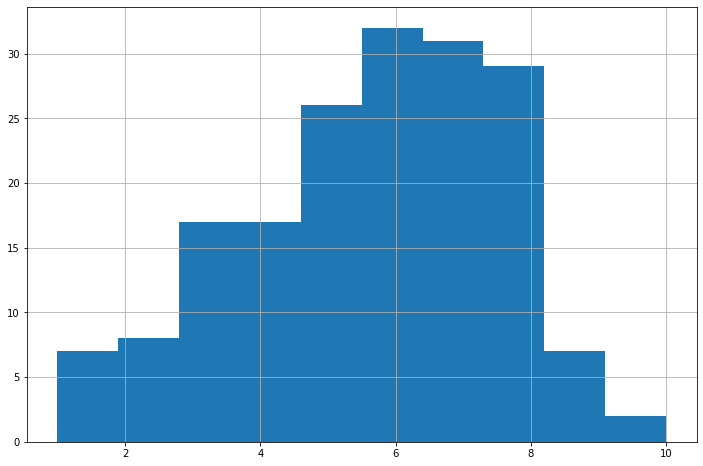

In [33]:
#fig, ax = plt.subplot(figsize=(10,10))
plt.figure(figsize=(12,8))
df['itemDifficulty'].hist()